In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from ipywidgets import interact, interactive_output, HBox
import ipywidgets as widgets


warnings.filterwarnings('ignore')

In [3]:
numeric_columns = ['Number of Ratings','Number of Reviews']
df = (
    pl.scan_csv('datasets/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')
    .drop(['source_URL', 'Book Description', 'About the Author'])
    # Remove commas from numeric columns and convert them to integers
    .with_columns([
        pl.col(column).str.replace(',', '').cast(pl.Int32).alias(column)
        for column in numeric_columns
    ])
    # extract kindle version from the kindle version and price column
    .with_columns(
        pl.col('Kindle Version and Price')
        .str.extract('([a-zA-Z ]+)')
        .str.strip_chars()
        .cast(pl.Categorical)
        .alias('Kindle Version'))
).collect()

In [4]:
df.sample(5)

Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64,cat
2121,"""Memoir & Autobiography""","""They Called Us Exceptional: An…","""Prachi Gupta""",4.42,1814,296,288,"""Hardcover""","""22-Aug-23""","""Kindle $13.99""",13.99,"""Kindle"""
30578,"""Fantasy""","""Sword Catcher""","""Cassandra Clare""",3.86,9263,2386,624,"""Hardcover""","""10-Oct-23""","""Kindle $14.99""",14.99,"""Kindle"""
3435,"""Young Adult Fiction""","""This Time It's Real""","""Ann Liang""",4.04,9981,2639,352,"""Hardcover""","""7-Feb-23""","""Kindle $1.99""",1.99,"""Kindle"""
3697,"""Nonfiction""","""Ultra-Processed People: The Sc…","""Chris van Tulleken""",4.45,7474,945,384,"""Hardcover""","""27-Apr-23""","""Kindle $9.66""",9.66,"""Kindle"""
57736,"""Young Adult Fiction""","""Five Survive""","""Holly Jackson""",4.07,98441,17770,388,"""Hardcover""","""29-Nov-22""","""Kindle $10.99""",10.99,"""Kindle"""


In [5]:
df.describe()

statistic,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
str,f64,str,str,str,f64,f64,f64,f64,str,str,str,f64,str
"""count""",299.0,"""299""","""299""","""299""",299.0,299.0,299.0,299.0,"""299""","""299""","""299""",299.0,"""299"""
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,"""0"""
"""mean""",19662.919732,null,null,null,4.063512,38748.351171,5241.705686,392.394649,null,null,null,11.327926,null
"""std""",32406.337679,null,null,null,0.252188,79586.655592,10800.06966,123.698044,null,null,null,5.351909,null
"""min""",935.0,"""Debut Novel""","""8 Rules of Love: How to Find I…","""Abby Jimenez""",3.52,228.0,71.0,192.0,"""Hardcover""","""1-Aug-23""","""Kindle $1.99""",0.0,null
"""25%""",3593.0,null,null,null,3.86,5553.0,959.0,320.0,null,null,null,9.99,null
"""50%""",10099.0,null,null,null,4.06,14519.0,2469.0,368.0,null,null,null,13.99,null
"""75%""",24792.0,null,null,null,4.25,37341.0,5112.0,432.0,null,null,null,14.99,null
"""max""",397565.0,"""Young Adult Fiction""","""Yours Truly""","""Ziwe""",4.75,930928.0,141668.0,1242.0,"""ebook""","""9-May-23""","""Kindle Unlimited $0.00""",17.99,null


In [6]:
cat_counts = df['Readers Choice Category'].value_counts(sort=True)
print(cat_counts)

shape: (15, 2)
┌─────────────────────────┬───────┐
│ Readers Choice Category ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ Fiction                 ┆ 20    │
│ Historical Fiction      ┆ 20    │
│ Mystery & Thriller      ┆ 20    │
│ Romance                 ┆ 20    │
│ Romantasy               ┆ 20    │
│ …                       ┆ …     │
│ Nonfiction              ┆ 20    │
│ Memoir & Autobiography  ┆ 20    │
│ History & Biography     ┆ 20    │
│ Humor                   ┆ 20    │
│ Debut Novel             ┆ 19    │
└─────────────────────────┴───────┘


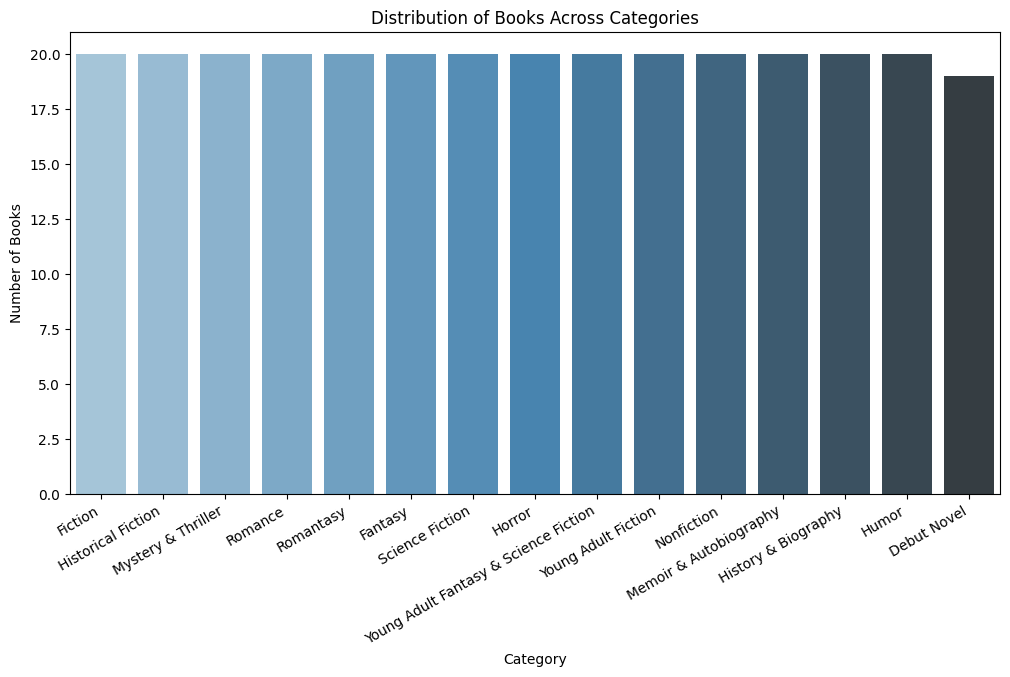

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Readers Choice Category', y='count', data=cat_counts, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

In [8]:
# Group by book category
result_df = df.group_by('Readers Choice Category')\
    .agg(
        pl.sum('Readers Choice Votes'),
        pl.mean('Total Avg Rating').round(2),
        pl.sum('Number of Ratings'),
        pl.sum('Number of Reviews'),
        pl.median('Number of Pages'),
        pl.median('Kindle Price').round(2)
    ).sort('Readers Choice Votes', descending=True)

result_df

Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
str,i64,f64,i32,i32,f64,f64
"""Romance""",645601,4.06,2737676,336747,398.0,6.99
"""Fiction""",587718,3.95,1288841,157445,328.0,14.99
"""Romantasy""",572812,4.07,1387830,203928,506.0,5.49
"""Mystery & Thriller""",519745,4.05,1673792,181312,365.5,14.99
"""Fantasy""",456020,4.1,523942,93625,407.5,14.73
…,…,…,…,…,…,…
"""Horror""",295053,3.91,316925,59709,360.0,14.99
"""Debut Novel""",285135,4.08,566320,77107,344.0,12.99
"""Nonfiction""",224029,4.18,185864,21393,320.0,14.99


In [9]:
layout = {
    'Number of Ratings': (0, 0),
    'Total Avg Rating': (0, 1),
    'Number of Pages': (1, 0),
    'Kindle Price': (1, 1),
}

sort_column = widgets.Dropdown(
    options=layout.keys(),
    value='Number of Ratings',
    description='Sort by:',
    disabled=False,
)

sort_direction = widgets.Dropdown(
    options=['ascending', 'descending'],
    value='ascending',
    description='Direction:',
    disabled=False,
)

dropdowns_row = HBox([sort_column, sort_direction])


def plot_columns_for_each_category(sort_column=sort_column, sort_direction=sort_direction):


    result_df_sorted = result_df.sort(by=sort_column, descending=sort_direction == 'descending') 
    # polars uses descending instead of ascending, which is more in line with Python conventions
    # polars also uses sort instead of sort_values, also more in line with Python conventions

    # figsize is (width, height) in inches
    fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)


    for column, (i, j) in layout.items():
        ax = axes[i, j]
        sns.barplot(x='Readers Choice Category', y=column, data=result_df_sorted, palette='Blues_d', ax=ax)
        ax.set_title(f'{column} for Each Category')
        ax.set_xticklabels(labels=result_df_sorted['Readers Choice Category'], rotation=30, ha='right')

    plt.tight_layout()
    plt.show()

out = interactive_output(plot_columns_for_each_category, {'sort_column': sort_column, 'sort_direction': sort_direction})
display(dropdowns_row, out)


Output()

In [10]:
layout = {
    'Readers Choice Votes': (0, 0),
    'Total Avg Rating': (0, 1),
    'Number of Ratings': (1, 0),
    'Number of Reviews': (1, 1),
    'Number of Pages': (2, 0),
    'Kindle Price': (2, 1),
}


sort_column = widgets.Dropdown(
    options=layout.keys(),
    value='Number of Ratings',
    description='Sort by:',
    disabled=False,
)

sort_direction = widgets.Dropdown(
    options=['ascending', 'descending'],
    value='ascending',
    description='Direction:',
    disabled=False,
)

dropdowns_row = HBox([sort_column, sort_direction])


def plot_boxplot_for_each_category(sort_column=sort_column, sort_direction=sort_direction):
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))

    for column, (i, j) in layout.items():
        ax = axes[i, j]
        cols = result_df.sort(by=sort_column, descending=sort_direction == 'descending')['Readers Choice Category'] # order by corresponding aggregated column
        sns.boxplot(data=df, x='Readers Choice Category', y=column, palette='Set3', ax=ax, order=cols)
        ax.set_title(f'{column} vs Category')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        
    fig.tight_layout()
    plt.show()

out = interactive_output(plot_boxplot_for_each_category, {'sort_column': sort_column, 'sort_direction': sort_direction})
display(dropdowns_row, out)

Output()

In [11]:
df.sort('Number of Ratings')
# df['Readers Choice Category']

Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64,cat
3247,"""History & Biography""","""Star Crossed: A True Romeo and…","""Heather Dune Macadam|Simon Wor…",4.07,228,97,320,"""Hardcover""","""22-Aug-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
2851,"""Nonfiction""","""Punished for Dreaming: How Sch…","""Bettina L. Love""",4.44,376,99,352,"""Hardcover""","""12-Sep-23""","""Kindle $14.99""",14.99,"""Kindle"""
1388,"""Science Fiction""","""The Jinn-Bot of Shantiport""","""Samit Basu""",3.7,450,181,404,"""Hardcover""","""3-Oct-23""","""Kindle $14.99""",14.99,"""Kindle"""
2257,"""Humor""","""Unreliable Narrator: Me, Mysel…","""Aparna Nancherla""",3.71,517,71,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99,"""Kindle"""
3340,"""Memoir & Autobiography""","""The Witching Year: A Memoir of…","""Diana Helmuth""",3.81,551,140,352,"""Hardcover""","""3-Oct-23""","""Kindle $14.99""",14.99,"""Kindle"""
…,…,…,…,…,…,…,…,…,…,…,…,…
46423,"""Romance""","""Things We Hide from the Light""","""Lucy Score""",4.09,260774,19060,594,"""Kindle Edition""","""21-Feb-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
71461,"""Memoir & Autobiography""","""Spare""","""Prince Harry|J.R. Moehringer""",3.88,310213,35794,410,"""Hardcover""","""10-Jan-23""","""Kindle $17.99""",17.99,"""Kindle"""
86468,"""Mystery & Thriller""","""The Housemaid's Secret""","""Freida McFadden""",4.28,321845,21398,318,"""Kindle Edition""","""20-Feb-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""


In [12]:
column = widgets.Dropdown(
    options=[
        'Readers Choice Votes',
        'Total Avg Rating',
        'Number of Ratings',
        'Number of Reviews',
        'Number of Pages',
        'Kindle Price'],
    value='Kindle Price',
    description='Column:',
    disabled=False,
)
bw_adjust = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1.0,
    step=0.05,
    description='BW Adjust:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

def do_kdeplot(column=column, bw_adjust=bw_adjust):
    # bw adjust adjusts the bandwidth of the kernel.
    # When you set a smaller bw_adjust, you get more contouring, but more noise
    # only use small values if you think your distribution is complex
    # the "cut" parameter determines how much the curve should extend beyond extreme datapoints
    # we set a "0" to not show negative values in the KDE curve
    sns.displot(data=df, x=column, palette='Set3', kind='kde', bw_adjust=bw_adjust, cut=0)
    
    # for a pure histogram plot
    # sns.displot(data=df, x='Kindle Price', palette='Set3')
    sns.displot(data=df, x=column, palette='Set3', kde=True)
    
    plt.show()
interact(do_kdeplot, column=column, bw_adjust=bw_adjust)

interactive(children=(Dropdown(description='Column:', index=5, options=('Readers Choice Votes', 'Total Avg Rat…

<function __main__.do_kdeplot(column=Dropdown(description='Column:', index=5, options=('Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages', 'Kindle Price'), value='Kindle Price'), bw_adjust=FloatSlider(value=0.5, description='BW Adjust:', max=1.0, step=0.05))>

In [13]:
options = list(df['Readers Choice Category'].unique())
cols_to_show = widgets.SelectMultiple(
    options=options,
    value=options,
    #rows=10,
    description='Categories',
    disabled=False,
    layout=widgets.Layout(height='300px')
)

def show_kde_with_cols(cols_to_show):
    
    sns.displot(
        data=df.filter(
            pl.col('Readers Choice Category').is_in(cols_to_show)
        ),
        x='Kindle Price', kind='kde', hue='Readers Choice Category', bw_adjust=0.5, hue_order=options)
    plt.show()


out = interactive_output(show_kde_with_cols, {'cols_to_show': cols_to_show})
display(HBox([out, cols_to_show]))

In [14]:
# print('$0 rows', df[df['Kindle Price'] == 0].shape)
# df[df['Kindle Price'] == 0].head()

free_df = df.filter(pl.col('Kindle Price') == 0)
print(free_df.shape)
free_df.head()

(40, 13)


Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64,cat
21854,"""Fiction""","""Maame""","""Jessica George""",4.08,62960,8664,320,"""Hardcover""","""31-Jan-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
18050,"""Fiction""","""The Collected Regrets of Clove…","""Mikki Brammer""",4.18,37341,5989,320,"""Hardcover""","""9-May-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
62211,"""Historical Fiction""","""Weyward""","""Emilia Hart""",4.12,83461,11008,329,"""Hardcover""","""2-Feb-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
29977,"""Historical Fiction""","""The Echo of Old Books""","""Barbara Davis""",4.34,45487,3439,431,"""Kindle Edition""","""28-Mar-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""
24150,"""Historical Fiction""","""Did You Hear About Kitty Karr?""","""Crystal Smith Paul""",3.76,30281,3268,416,"""Hardcover""","""2-May-23""","""Kindle Unlimited $0.00""",0.0,"""Kindle Unlimited"""


In [15]:
result_df

Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
str,i64,f64,i32,i32,f64,f64
"""Romance""",645601,4.06,2737676,336747,398.0,6.99
"""Fiction""",587718,3.95,1288841,157445,328.0,14.99
"""Romantasy""",572812,4.07,1387830,203928,506.0,5.49
"""Mystery & Thriller""",519745,4.05,1673792,181312,365.5,14.99
"""Fantasy""",456020,4.1,523942,93625,407.5,14.73
…,…,…,…,…,…,…
"""Horror""",295053,3.91,316925,59709,360.0,14.99
"""Debut Novel""",285135,4.08,566320,77107,344.0,12.99
"""Nonfiction""",224029,4.18,185864,21393,320.0,14.99


In [25]:
# Assign the columns
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']
diverging_cmaps = [
    'coolwarm', 'BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 
    'RdYlBu', 'RdYlGn', 'Spectral', 'bwr', 'seismic'
]
cmap_widget = widgets.SelectionSlider(
    options=diverging_cmaps,
    value=diverging_cmaps[0],
    description='Color Map:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
)
rev_widget = widgets.Checkbox(
    value=False,
    description='Reverse: ',
    disabled=False,
    indent=False
)
# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()
def show_corr(cmap, reversed):
    # Display the correlation matrix
    plt.figure(figsize=(10, 8))
    if reversed:
        cmap += '_r'
    
    # BrBG is another cool heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=30, ha='right')
    plt.show()

interact(show_corr, cmap=cmap_widget, reversed=rev_widget)

interactive(children=(SelectionSlider(description='Color Map:', options=('coolwarm', 'BrBG', 'PiYG', 'PRGn', '…

<function __main__.show_corr(cmap, reversed)>